In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# create classification data with 2 informative variables and 4 non-informative variables
X, y = make_classification(n_samples = 1000, n_features = 6, n_informative = 2, n_classes = 2, random_state = 134)

# convert into a pandas dataframe with column names x1, x2, x3, etc.
df = pd.DataFrame(X, columns=[f'x{i}' for i in range(1, 7)])
df['target'] = y


C:\Users\wodnj\AppData\Local\Temp\ipykernel_9592\3836956802.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df

,x1,x2,x3,x4,x5,x6,target
0,-0.175607,2.096776,0.193515,-0.197979,0.614337,0.152221,0
1,-0.237559,-0.900253,0.851576,0.122654,-0.659372,0.597719,1
2,-0.619941,0.631125,3.617209,1.243602,-0.232297,2.486463,1
3,1.267036,-0.086827,-0.899692,1.757201,2.059507,-0.768438,0
4,0.286389,-1.264438,-2.358642,-1.029750,-0.792644,-1.605442,0
...,...,...,...,...,...,...,...
995,1.761970,-0.909970,-0.783485,2.753219,-0.956613,-0.757950,0
996,-0.867464,-1.030907,-1.262156,-2.446485,-0.547518,-0.721530,0
997,-2.901635,0.011812,3.165859,-3.292270,0.788811,2.494164,1
998,0.769074,0.267471,-1.052058,0.731624,0.563602,-0.802538,1


In [3]:
from sklearn.model_selection import train_test_split

# stratified split into training and testing sets
X_train_orig, X_test, y_train_orig, y_test = train_test_split(
    df.drop('target', axis = 1), df['target'], test_size = 0.2, random_state = 134, stratify = df['target'])

# nested train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size = 0.25, random_state = 134, stratify = y_train_orig)

In [4]:
X_train_orig.shape

(800, 6)

In [5]:
X_test.shape

(200, 6)

In [6]:
X_train.shape

(600, 6)

In [7]:
X_val.shape

(200, 6)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def create_scatter_plot(data, labels):
    """
    Create a scatter plot of the first two columns of the input dataset, colored by labels.
    
    Args:
        data (numpy array or pandas DataFrame): Input dataset.
        labels (array-like): Labels for coloring the dots in the scatter plot.
    """
    # extract the first two columns of the data
    if isinstance(data, pd.DataFrame):
        x1 = data.iloc[:, 0]
        x2 = data.iloc[:, 1]
    elif isinstance(data, np.ndarray):
        x1 = data[:, 0]
        x2 = data[:, 1]
    else:
        raise ValueError("Input data must be a numpy array or a pandas DataFrame.")
    
    # set the color palette for the scatter plot
    palette = "colorblind"
    
    # create scatter plot
    plt.figure(figsize = (10, 6))
    sns.scatterplot(x = x1, y = x2, hue = labels, palette = palette)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Scatter Plot of Feature 1 vs Feature 2')
    
    # plt.colorbar(label='Labels')
    plt.show()


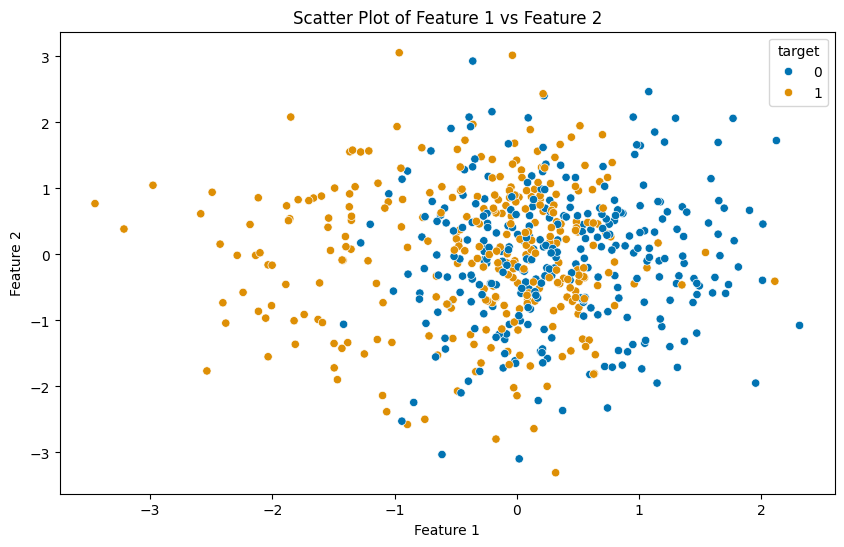

In [9]:
create_scatter_plot(data = X_train, labels = y_train)

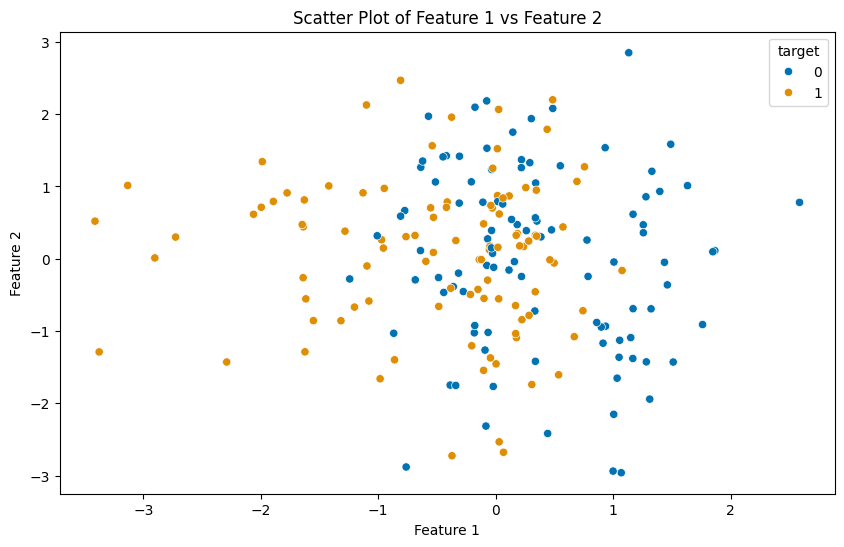

In [10]:
create_scatter_plot(data = X_val, labels = y_val)

### Fit and Predict

In [11]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model
lr_model = LogisticRegression(random_state = 123)

# fit the model to the training data
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=123)

In [12]:
# make predictions on the validation set
y_pred = lr_model.predict(X_val)

### Evaluation

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)

# calculate precision score
precision = precision_score(y_val, y_pred)

# calculate recall score
recall = recall_score(y_val, y_pred)

# calculate f1 score
f1 = f1_score(y_val, y_pred)

# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy))
print("Validation Precision: {:.2f}".format(precision))
print("Validation Recall: {:.2f}".format(recall))
print("Validation F1-score: {:.2f}".format(f1))

# print classification report
print(classification_report(y_val, y_pred))

# print confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_mat)

Validation Accuracy: 0.88
Validation Precision: 0.84
Validation Recall: 0.94
Validation F1-score: 0.89
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       100
           1       0.84      0.94      0.89       100

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200

Confusion Matrix:
 [[82 18]
 [ 6 94]]


### Confusion Matrix

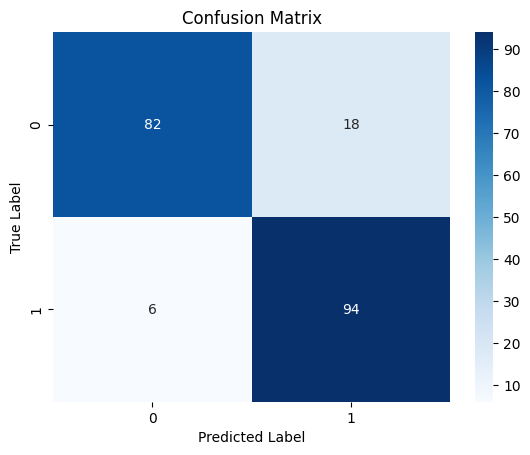

In [14]:
# plot confusion matrix
sns.heatmap(conf_mat, annot = True, cmap = "Blues", fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

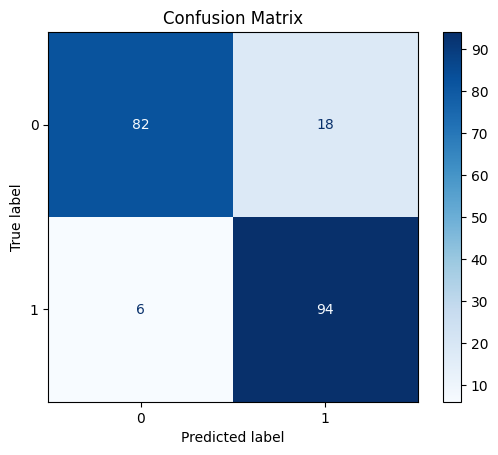

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# creating confusion matrix plot using the fitted model with `from_estimator()` method
ConfusionMatrixDisplay.from_estimator(lr_model, X_val, y_val, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

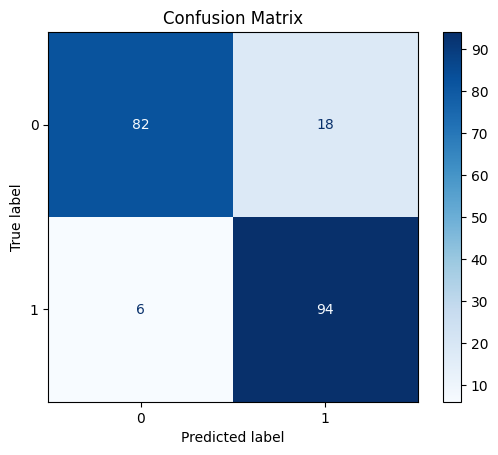

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

# creating confusion matrix plot using the predictions using `from_predictions()` method
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## Tuning Logistic Regression Using a Single Parameter

In [17]:
import numpy as np

# generate values for C between 0.0001 and 10000 in 10-fold increments
C_values = np.logspace(-4, 4, num = 9, base = 10)
C_values

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

In [18]:
# initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []

# loop through each value of C
for c in C_values:
    # create logistic regression model with current value of C
    lr_model = LogisticRegression(C = c, random_state = 134)
    
    # fit the model on training set
    lr_model.fit(X_train, y_train)
    
    # make predictions on training set
    y_train_pred = lr_model.predict(X_train)
    
    # make predictions on validation set
    y_val_pred = lr_model.predict(X_val)
    
    # calculate accuracy for training set
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # calculate accuracy for validation set
    val_acc = accuracy_score(y_val, y_val_pred)
    
    # append accuracy values to respective lists
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# convert results to numpy arrays
train_accuracies = np.array(train_accuracies)
val_accuracies = np.array(val_accuracies)

# round the results to 3 decimal points
train_accuracies = np.round(train_accuracies, 3)
val_accuracies = np.round(val_accuracies, 3)

# print the results
for i in range(len(C_values)):
    print(f"C: {C_values[i]}, Train Accuracy: {train_accuracies[i]}, Val Accuracy: {val_accuracies[i]}")

C: 0.0001, Train Accuracy: 0.887, Val Accuracy: 0.845
C: 0.001, Train Accuracy: 0.887, Val Accuracy: 0.855
C: 0.01, Train Accuracy: 0.908, Val Accuracy: 0.875
C: 0.1, Train Accuracy: 0.915, Val Accuracy: 0.875
C: 1.0, Train Accuracy: 0.912, Val Accuracy: 0.88
C: 10.0, Train Accuracy: 0.91, Val Accuracy: 0.88
C: 100.0, Train Accuracy: 0.91, Val Accuracy: 0.88
C: 1000.0, Train Accuracy: 0.91, Val Accuracy: 0.88
C: 10000.0, Train Accuracy: 0.91, Val Accuracy: 0.88


In [19]:
train_accuracies

array([0.887, 0.887, 0.908, 0.915, 0.912, 0.91 , 0.91 , 0.91 , 0.91 ])

In [20]:
val_accuracies

array([0.845, 0.855, 0.875, 0.875, 0.88 , 0.88 , 0.88 , 0.88 , 0.88 ])

### Create a Validation Curve

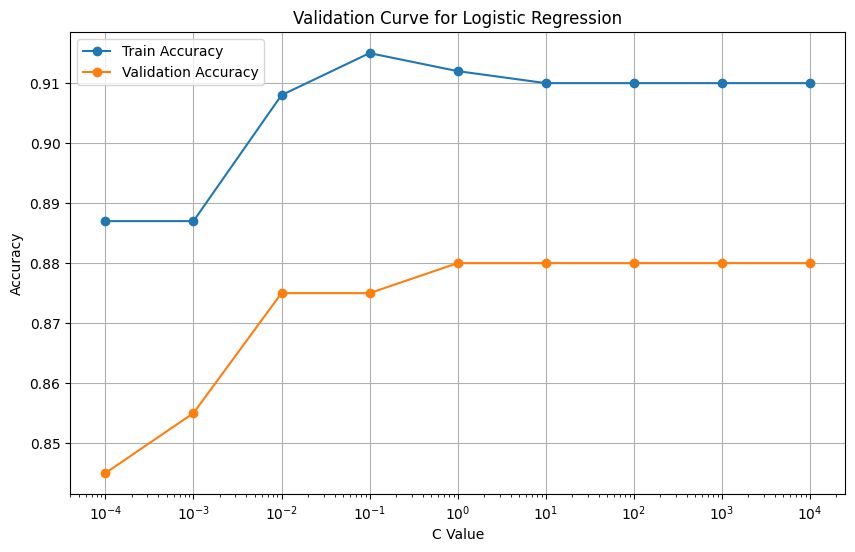

In [21]:
# create a validation curve
plt.figure(figsize = (10, 6))
plt.plot(C_values, train_accuracies, 'o-', label = 'Train Accuracy')
plt.plot(C_values, val_accuracies, 'o-', label = 'Validation Accuracy')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Validation Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


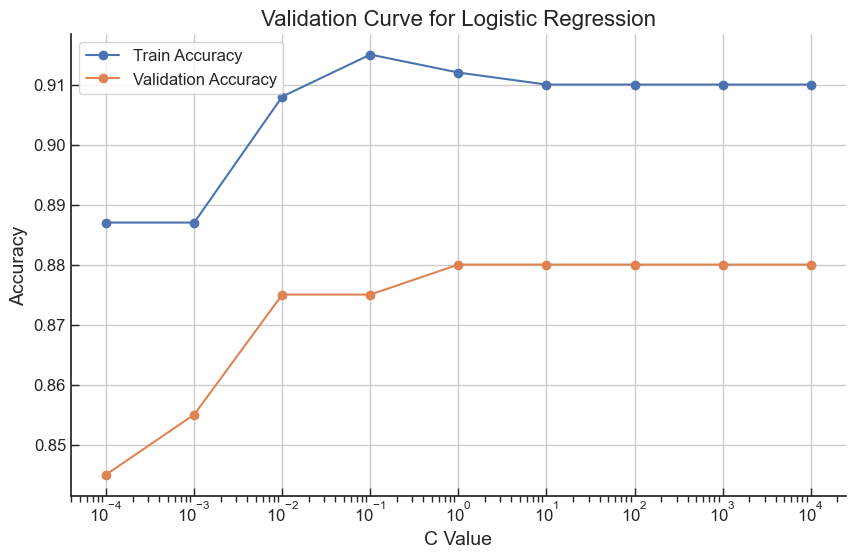

In [22]:
# set seaborn style
sns.set(style = 'ticks', context = 'notebook')

# create a validation curve
plt.figure(figsize = (10, 6))
plt.plot(C_values, train_accuracies, 'o-', label = 'Train Accuracy')
plt.plot(C_values, val_accuracies, 'o-', label = 'Validation Accuracy')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Validation Curve for Logistic Regression')
plt.legend()
plt.grid(True)

# customize plot aesthetics
sns.despine()  # remove top and right spines
plt.tick_params(direction='in', length = 6, width = 1)  # set tick parameters
plt.title('Validation Curve for Logistic Regression', fontsize = 16)  # set title font size
plt.xlabel('C Value', fontsize = 14)  # set x-axis label font size
plt.ylabel('Accuracy', fontsize = 14)  # set y-axis label font size
plt.xticks(fontsize = 12)  # set x-axis tick label font size
plt.yticks(fontsize = 12)  # set y-axis tick label font size
plt.legend(fontsize = 12)  # set legend font size

plt.show()


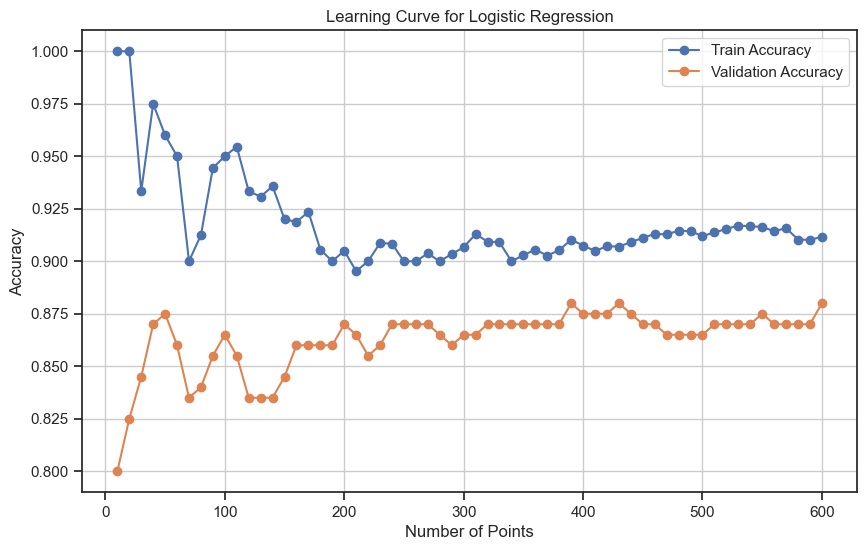

In [23]:
# initialize lists to store train and validation accuracies
train_accuracies = []
val_accuracies = []

# define the list of number of points
num_points = list(range(10, 610, 10))

# loop over the number of points
for num in num_points:
    # select a subset of training data
    X_train_subset = X_train[:num]
    y_train_subset = y_train[:num]
    
    # train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train_subset, y_train_subset)
    
    # make predictions on the training and validation sets
    y_train_pred = model.predict(X_train_subset)
    y_val_pred = model.predict(X_val)
    
    # calculate accuracy for training and validation sets
    train_acc = accuracy_score(y_train_subset, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    # append accuracies to the lists
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# convert lists to numpy arrays
train_accuracies = np.array(train_accuracies)
val_accuracies = np.array(val_accuracies)

# create a line plot with dots
plt.figure(figsize = (10, 6))
plt.plot(num_points, train_accuracies, 'o-', label = 'Train Accuracy')
plt.plot(num_points, val_accuracies, 'o-', label = 'Validation Accuracy')
plt.xlabel('Number of Points')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


## Final model

Accuracy: 0.885
Precision: 0.905
Recall: 0.860
F1-score: 0.882
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       100
           1       0.91      0.86      0.88       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



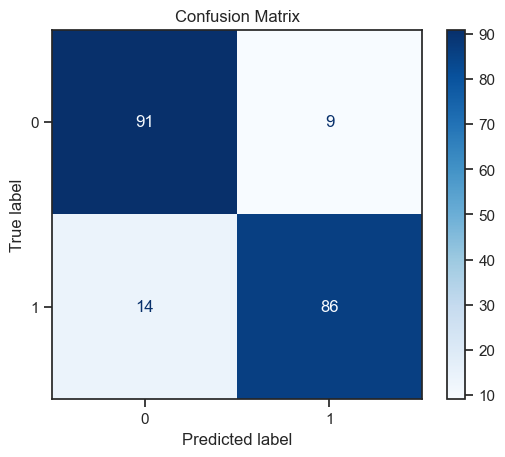

In [24]:
# create and train a logistic regression model with C = 1
final_model = LogisticRegression(C = 1, random_state = 134)
final_model.fit(X_train_orig, y_train_orig)

# make predictions on the testing set
y_pred = final_model.predict(X_test)

# calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# print performance metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# print classification report
print(classification_report(y_test, y_pred))

# create confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()